# *Bank Personal Loan Modelling*

## *Introduction*

**AllLife Bank, a prominent financial institution in the United States, has experienced substantial growth in its customer base. While the majority of customers are liability customers, characterized by varying deposit sizes, the bank aims to expand its borrower base to enhance its loan business and, consequently, increase revenue through interest on loans. The focus is on converting existing liability customers into personal loan customers while retaining them as depositors.**

**In a successful campaign conducted last year targeting liability customers, the bank achieved an impressive conversion rate of over 9%. Encouraged by this success, the retail marketing department is now eager to improve the success ratio further by employing targeted marketing strategies.**

**As a Data Scientist at AllLife Bank, the objective is to build a predictive model that will assist the marketing department in identifying potential customers with a higher probability of purchasing a personal loan. This model will enable the bank to optimize its marketing efforts and enhance the efficiency of converting liability customers into valuable personal loan customers.**

## *Dataset Overview*

**The dataset provided for this project, named "Bank Personal Loan Modelling," contains essential information about AllLife Bank's customers. The dataset encompasses details on customers who are both liability (depositors) and borrowers (asset customers). The goal is to analyze and leverage this data to predict the likelihood of a customer opting for a personal loan.**

## *Project Objective*

**The primary objective of this machine learning project is to develop a robust predictive model that can identify potential customers with a higher probability of accepting a personal loan offer. By leveraging historical data and customer attributes, the model will assist the marketing department in strategically targeting individuals who are more likely to convert, thereby maximizing the success ratio of personal loan campaigns.**

**Let's delve into the exploration and analysis of the dataset, followed by the implementation of machine learning algorithms to achieve this goal.**

# **Importing the Required Libraries**

In [81]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# **Loading the Dataset**

In [83]:
dataset = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

# **Exploratory Data Analysis (EDA)**

In preparation for constructing a predictive model, a thorough Exploratory Data Analysis (EDA) of the "Bank Personal Loan Modelling" dataset is essential. This initial phase involves gaining an overview of the dataset's dimensions, variable types, and values. Descriptive statistics will be computed to extract numerical insights, shedding light on the central tendencies and variations within the data. 

Our exploration extends to uncovering patterns and relationships between variables, employing visualizations to discern correlations. Addressing missing values is a pivotal aspect, ensuring data completeness for reliable modeling. Throughout the EDA process, we remain attentive to potential feature engineering opportunities that could enhance the model's predictive capabilities. In summary, EDA serves as the compass guiding subsequent decisions in preprocessing, feature selection, and the overall model-building strategy, aiming to provide actionable insights for effective marketing targeting and personal loan conversion.

In [84]:
dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [85]:
# Checking the first 5 rows
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [86]:
# Checking the last 5 rows
dataset.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [87]:
dataset.shape

(5000, 14)

### **Checking Null Values and Duplicates in the Dataset**

In [88]:
# Checking null values in the dataset
dataset.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [89]:
# Checking duplicates in the dataset
dataset.duplicated().sum()

0

**Our dataset does not have any null values and duplicates.**

**Now we can proceed with confidence, knowing that our dataset is clean and ready for further analysis.**

**Next, Lets check the names and some additional information about all the columns in our dataset.**

In [90]:
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

**Dataset Features**

---
**ID** : Unique identifier for each customer.

**Age** : Age of the customer.

**Experience** : Years of professional experience.

**Income** : Customer's annual income.

**ZIP Code** : Customer's postal code.

**Family** : Size of the customer's family.

**CCAvg** : Average credit card spending per month.

**Education** : Level of education attained.

**Mortgage** : Mortgage value, if applicable.

**Personal Loan** : Target variable indicating acceptance of a personal loan offer.

**Securities Account** : Whether the customer has a securities account.

**CD Account** : Whether the customer has a certificate of deposit account.

**Online** : Whether the customer uses online banking.

**CreditCard** : Whether the customer has a credit card.


In [91]:
# Getting more information about the columns
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [92]:
# Checking the datatypes of each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**We can see that:**
1. All our features have Numerical value
2. Our Target Variable is "Personal Loan"

## **Visualizations**

In [93]:
# Lets replace the Numeric Values with Categorical Values for the sake of Visualizations

dataset["Personal Loan"]=dataset["Personal Loan"].replace({0:"Not Taken",1:"Taken"})
dataset["Education"]=dataset["Education"].replace({1:"Undergraduate",2:"Graduate",3:"Professional"})
dataset["Securities Account"]=dataset["Securities Account"].replace({0:"Does Not Have",1:"Have"})
dataset["CD Account"]=dataset["CD Account"].replace({0:"Does Not Have",1:"Have"})
dataset["Online"]=dataset["Online"].replace({0:"Not Using",1:"Using"})
dataset["CreditCard"]=dataset["CreditCard"].replace({0:"Does Not Have",1:"Have"})   

In [94]:
dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergraduate,0,Not Taken,Have,Does Not Have,Not Using,Does Not Have
1,2,45,19,34,90089,3,1.5,Undergraduate,0,Not Taken,Have,Does Not Have,Not Using,Does Not Have
2,3,39,15,11,94720,1,1.0,Undergraduate,0,Not Taken,Does Not Have,Does Not Have,Not Using,Does Not Have
3,4,35,9,100,94112,1,2.7,Graduate,0,Not Taken,Does Not Have,Does Not Have,Not Using,Does Not Have
4,5,35,8,45,91330,4,1.0,Graduate,0,Not Taken,Does Not Have,Does Not Have,Not Using,Have
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,Professional,0,Not Taken,Does Not Have,Does Not Have,Using,Does Not Have
4996,4997,30,4,15,92037,4,0.4,Undergraduate,85,Not Taken,Does Not Have,Does Not Have,Using,Does Not Have
4997,4998,63,39,24,93023,2,0.3,Professional,0,Not Taken,Does Not Have,Does Not Have,Not Using,Does Not Have
4998,4999,65,40,49,90034,3,0.5,Graduate,0,Not Taken,Does Not Have,Does Not Have,Using,Does Not Have


In [95]:
# Class Distribution of Target Variable

dataset["Personal Loan"].value_counts() 

Not Taken    4520
Taken         480
Name: Personal Loan, dtype: int64

In [96]:
loan_count=dataset["Personal Loan"].value_counts()

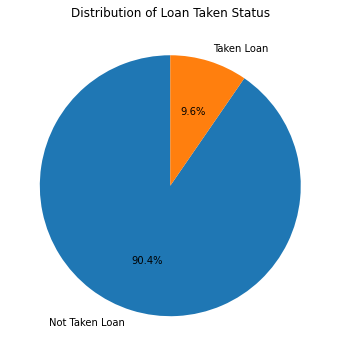

In [97]:
plt.figure(figsize=(6, 6))
plt.pie(loan_count,labels=["Not Taken Loan ", "Taken Loan"], autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Loan Taken Status")
plt.show()

**OBSERVATION**

---

1. From above pie chart we can see that our target variable distribution is highly imbalanced.
2. Majority of the customers Not taken the personal loan **(90.40%)**
3. Only **(9.60%)** customers has taken the loan.


<AxesSubplot:xlabel='Education', ylabel='count'>

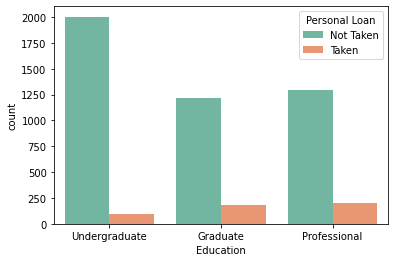

In [98]:
sns.countplot(x="Education",data=dataset,hue="Personal Loan",palette="Set2")

**OBSERVATION**
1. Customers that belong to education category **Graduation** and **Professional** have taken more Personal Loan then the **Undergraduate** class.

<AxesSubplot:xlabel='Family', ylabel='count'>

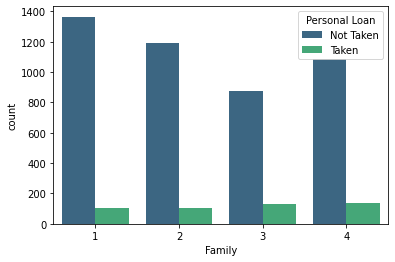

In [99]:
sns.countplot(x='Family',data=dataset,hue="Personal Loan",palette="viridis")

**OBSERVATION**

---
1. Family size of 3 and 4 members are tending to take Personal Loan.

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

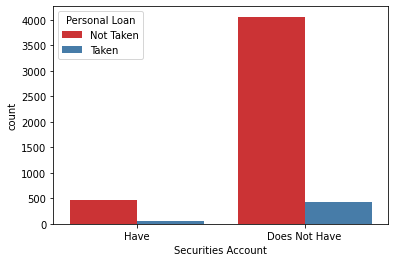

In [100]:
sns.countplot(x="Securities Account",data=dataset,hue="Personal Loan",palette="Set1")

**OBSERVATION**

---

1. The customers who do not have a securities A/C have taken more loans compared to those who have a securities A/C.

<AxesSubplot:xlabel='CD Account', ylabel='count'>

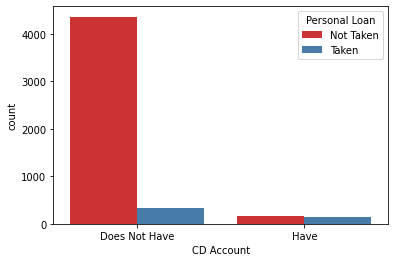

In [101]:
sns.countplot(x="CD Account",data=dataset,hue="Personal Loan",palette="Set1")

**OBSERVATION**

---


1. We can see that customers who have a **Certificate of Deposit (CDAccount)** have mostly taken a Personal Loan.

2. Who do not have **Certificate of Deposit(CDAccount)** Most of them is not taken the personal loan.

<AxesSubplot:xlabel='Online', ylabel='count'>

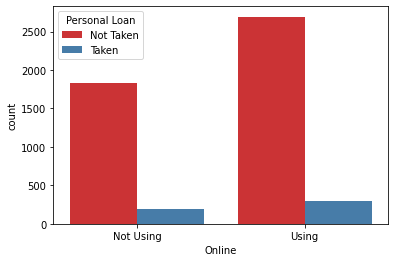

In [102]:
sns.countplot(x="Online",data=dataset,hue="Personal Loan",palette="Set1")

**OBSERVATION**

---
1. Customers who use **online banking** services are more likely to have a higher number of personal loans than those who do not use online services.

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

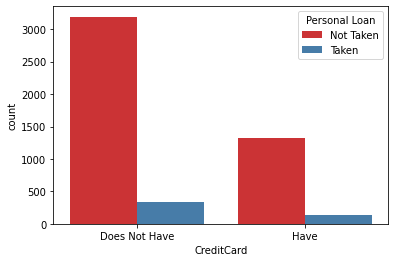

In [103]:
sns.countplot(x="CreditCard",data=dataset,hue="Personal Loan",palette="Set1")

**OBSERVATION**

---
1. Most people who have a **credit card** do not seem to take out a personal loan.

In [104]:
# Now, Lets replace the original Numerical values back in the dataset

dataset["Personal Loan"]=dataset["Personal Loan"].replace({"Not Taken":0,"Taken":1})
dataset["Education"]=dataset["Education"].replace({"Undergraduate":1,"Graduate":2,"Professional":3})
dataset["Securities Account"]=dataset["Securities Account"].replace({"Does Not Have":0,"Have":1})
dataset["CD Account"]=dataset["CD Account"].replace({"Does Not Have":0,"Have":1})
dataset["Online"]=dataset["Online"].replace({"Not Using":0,"Using":1})
dataset["CreditCard"]=dataset["CreditCard"].replace({"Does Not Have":0,"Have":1})   

In [105]:
dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [106]:
# Checking the Outliers
columns_to_plot = ['Age','Income', 'Family', 'CCAvg', 'Education', 'Mortgage' ,'Securities Account', 'CD Account', 'Online', 'CreditCard']

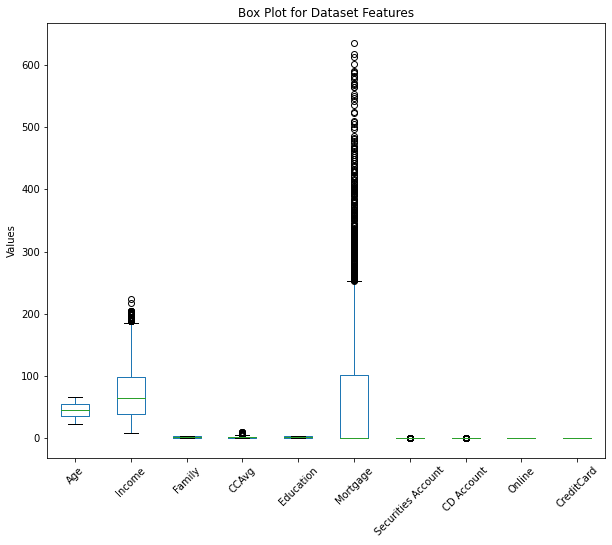

In [107]:
dataset[columns_to_plot].plot(kind="box", figsize=(10, 8))
plt.title("Box Plot for Dataset Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

**Box Plot**


---
1. We can see that (Income,CCavg,Mortgage,Securities Account,CD Account) in this column some outliers are there.
2. Income is not fixed .it is based on several factors.
3. CCAvg is not fixed and it based on the spending behavior of the credit cardholder.
4. Mortage is also depend on the individuals.
5. Securities Account & CD Account having values in format of 0 & 1.
(0:means not having account,1:means having account)
6. I dont think so that the **outliers** are **Error** points.


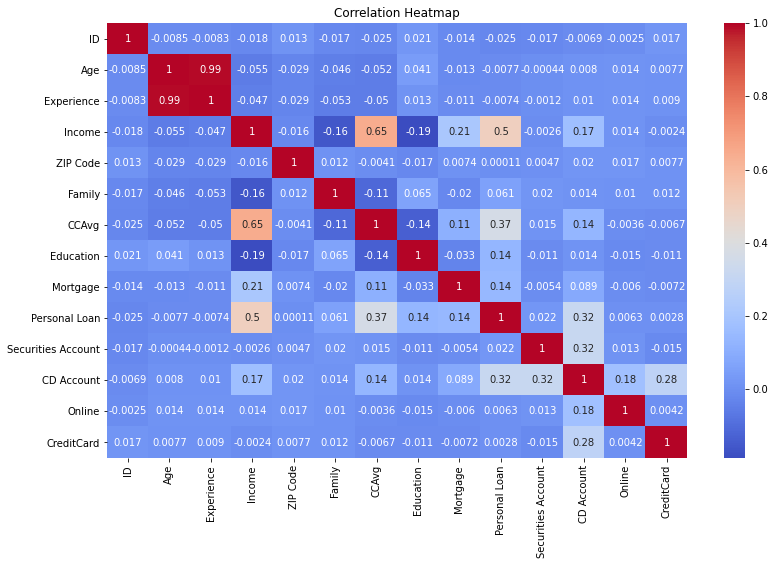

In [108]:
# Visualizing the Correlation Heatmap
correlation_matrix = dataset.corr()
plt.figure(figsize=(13,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

**OBSERVATION**


---

1. **"Experience"** and **"Age"** looks like highly positively correlated with each other.We can remove one of the variable to avoid multi-collinearity problem.
2. The other point is **"CCavg"** & **"Income"** is also correlated with each other.
3. But **"CCAvg"** contains values in month & **"Income"** contains values in annually.
4. we need to convert **"CCAvg"** in Annual.

# **Preprocessing**

In [109]:
# Replace "CCAvg" with Annual 

dataset['CCAvg'] = dataset['CCAvg']*12

In [110]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,12.0,2,0,0,0,0,0,1


In [112]:
dataset.drop(["ID", "ZIP Code"],inplace=True,axis=1)

1. ID is uniformly distributed. Therefore, ID acts as an identifier and lacks valuable information for the model.
2. ZIP Code contains a large number of categories .
3. Therefore, it seems it lacks much informaton for our model.

In [113]:
dataset.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,19.2,1,0,0,1,0,0,0
1,45,19,34,3,18.0,1,0,0,1,0,0,0
2,39,15,11,1,12.0,1,0,0,0,0,0,0
3,35,9,100,1,32.4,2,0,0,0,0,0,0
4,35,8,45,4,12.0,2,0,0,0,0,0,1


In [114]:
dataset.drop("Experience",inplace=True,axis=1)

1. The dataset contains negative values for the Experience, which is unreasonable.
2. Further in our heatmap exploration, we have found that experience has a high correlation to age and will be dropping this column so we don't necessarily have to handle negative values.

# Dividing into Independent (X) & Dependent (y) variables

In [115]:
# SPLITING INTO INDEPENDENT & DEPENDENT FEATURES
X=dataset.drop("Personal Loan",axis=1)
y=dataset["Personal Loan"]

# **Train Test Split**

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

## Standard Scaler

In [117]:
# Creating an object for numeric features 
numeric_columns=["Age","Income","CCAvg","Mortgage"]

In [118]:
sc = StandardScaler()
X_train[numeric_columns] = sc.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = sc.transform(X_test[numeric_columns])

In [119]:
# Ensuring that the scaling has been applied to the training data using the scaler.
X_train

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3115,-1.256633,0.794945,2,-0.990617,1,-0.559325,0,0,0,0
3261,1.641364,1.224918,1,1.048374,1,-0.559325,0,0,0,0
2733,0.851001,-0.043503,3,-0.933978,2,0.887982,0,0,0,0
1666,0.499729,2.493338,2,1.274929,2,-0.559325,0,0,1,0
1900,1.377910,-1.376419,4,-0.877340,2,-0.559325,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2021,0.060638,0.622956,4,1.614761,3,-0.559325,0,0,1,0
3664,0.236275,-0.666963,3,-0.027760,2,-0.559325,0,0,1,0
2128,1.729182,-0.731459,1,-0.480869,3,-0.559325,0,0,0,0
1585,1.026638,1.224918,2,0.425349,1,-0.559325,0,0,0,0


In [120]:
# Ensuring that the scaling has been applied to the testing data using the scaler.
X_test

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3817,1.729182,1.418406,1,-0.594146,1,-0.559325,0,0,0,0
1618,-1.432269,-0.967945,3,-0.537508,1,-0.559325,0,0,1,1
3188,0.851001,0.343473,2,1.444845,3,-0.559325,0,0,0,1
4396,-1.344451,-1.290424,4,-0.820701,3,-0.559325,0,0,1,0
101,1.377910,-0.946446,3,-0.367592,2,-0.559325,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3380,1.641364,-1.139934,1,-0.650785,2,0.188942,0,0,0,1
3205,1.202274,-0.774457,1,-0.310953,1,-0.559325,0,0,1,1
4222,0.499729,-0.344484,3,-0.707424,2,1.636250,0,0,0,0
1586,1.202274,-0.516473,2,0.198795,3,-0.559325,0,0,0,1


Using of Standard Scaler, we make our data more compliant to machine learning algorithms, ensuring better model performance and more reliable comparisons between different features.

# OverSampling (SMOTE)

In [121]:
os=SMOTE(random_state=123)

In [122]:
X_train_os,y_train_os=os.fit_resample(X_train,y_train)

In [123]:
# Distribution of target variable after oversampling
y_train_os.value_counts()

0    3616
1    3616
Name: Personal Loan, dtype: int64

1. Over-sampling Technique used in machine learning to address the class imbalance problem, particularly in classification tasks where one class significantly outnumbers the other.
2. This helps balance the class distribution.
3. I am using over sampling because,we aim to improve the model's ability to recognize and generalize patterns in the minority class, resulting in a more balanced and powerful predictive model.

# Model Fitting 

### 1. Logistic Regression

In [124]:
logi_os = LogisticRegression()

In [125]:
logi_os.fit(X_train_os,y_train_os)

LogisticRegression()

In [126]:
logi_os_pred = logi_os.predict(X_test)

In [127]:
confusion_matrix(y_test,logi_os_pred)

array([[810,  94],
       [ 13,  83]], dtype=int64)

In [128]:
accuracy_score(y_test,logi_os_pred)

0.893

In [129]:
print(classification_report(y_test,logi_os_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       904
           1       0.47      0.86      0.61        96

    accuracy                           0.89      1000
   macro avg       0.73      0.88      0.77      1000
weighted avg       0.93      0.89      0.91      1000



In [130]:
print('Precision score:', precision_score(y_test,logi_os_pred)*100)
print('Recall score:', recall_score(y_test,logi_os_pred)*100)
print('F1-score:', f1_score(y_test,logi_os_pred)*100)
print('Accuracy:', accuracy_score(y_test,logi_os_pred)*100)

Precision score: 46.89265536723164
Recall score: 86.45833333333334
F1-score: 60.80586080586081
Accuracy: 89.3


### 2. Support Vector Classifier

In [131]:
sv_os = SVC()

In [132]:
sv_os.fit(X_train_os,y_train_os)

SVC()

In [133]:
sv_os_pred = sv_os.predict(X_test)

In [134]:
confusion_matrix(y_test,sv_os_pred)

array([[872,  32],
       [  5,  91]], dtype=int64)

In [135]:
accuracy_score(y_test,sv_os_pred)

0.963

In [136]:
print(classification_report(y_test,sv_os_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       904
           1       0.74      0.95      0.83        96

    accuracy                           0.96      1000
   macro avg       0.87      0.96      0.91      1000
weighted avg       0.97      0.96      0.97      1000



In [137]:
print('Precision score:', precision_score(y_test,sv_os_pred)*100)
print('Recall score:', recall_score(y_test,sv_os_pred)*100)
print('F1-score:', f1_score(y_test,sv_os_pred)*100)
print('Accuracy:', accuracy_score(y_test,sv_os_pred)*100)

Precision score: 73.98373983739837
Recall score: 94.79166666666666
F1-score: 83.10502283105022
Accuracy: 96.3


### 3. Naive Bayes

In [138]:
nb_os=GaussianNB()

In [139]:
nb_os.fit(X_train_os,y_train_os)

GaussianNB()

In [140]:
nb_os_pred = nb_os.predict(X_test)

In [141]:
confusion_matrix(y_test,nb_os_pred)

array([[805,  99],
       [ 18,  78]], dtype=int64)

In [142]:
accuracy_score(y_test,nb_os_pred)

0.883

In [143]:
print(classification_report(y_test,nb_os_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       904
           1       0.44      0.81      0.57        96

    accuracy                           0.88      1000
   macro avg       0.71      0.85      0.75      1000
weighted avg       0.93      0.88      0.90      1000



In [144]:
print('Precision score:', precision_score(y_test,nb_os_pred)*100)
print('Recall score:', recall_score(y_test,nb_os_pred)*100)
print('F1-score:', f1_score(y_test,nb_os_pred)*100)
print('Accuracy:', accuracy_score(y_test,nb_os_pred)*100)

Precision score: 44.06779661016949
Recall score: 81.25
F1-score: 57.14285714285714
Accuracy: 88.3


# Accuracy Comparision

In [145]:
final_os_data=pd.DataFrame({'Models':['LOGI_OS','SVC_OS','NB_OS'],
                         'Accuracy':[accuracy_score(y_test,logi_os_pred),
                                     accuracy_score(y_test,sv_os_pred),
                                     accuracy_score(y_test,nb_os_pred)],
                         'precision':[precision_score(y_test,logi_os_pred),
                                      precision_score(y_test,sv_os_pred),
                                      precision_score(y_test,nb_os_pred)],
                         'Recall':[recall_score(y_test,logi_os_pred),
                                   recall_score(y_test,sv_os_pred),
                                   recall_score(y_test,nb_os_pred)],
                         'F1-Score':[f1_score(y_test,logi_os_pred),
                                     f1_score(y_test,sv_os_pred),
                                     f1_score(y_test,nb_os_pred)]})

In [146]:
final_os_data

,Models,Accuracy,precision,Recall,F1-Score
0,LOGI_OS,0.893,0.468927,0.864583,0.608059
1,SVC_OS,0.963,0.739837,0.947917,0.831050
2,NB_OS,0.883,0.440678,0.812500,0.571429


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

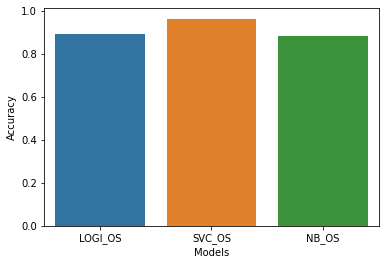

In [147]:
sns.barplot(x = 'Models', y = 'Accuracy', data = final_os_data)

# Conclusion

1. In conclusion, the analysis reveals that the dataset contains a highly imbalanced target variable, with a majority of customers (4520) not taking personal loans (0) and a smaller number (480) taking loans (1). 
2. Further exploration indicates that customers with educational backgrounds in Graduation and Professional categories are more likely to take personal loans compared to those with an Undergraduate education.
3. Family size also plays a role, with customers from families with 3 or 4 members showing a higher tendency to take personal loans. 
4. The absence of a securities account seems to be associated with a higher likelihood of taking a personal loan, while having a Certificate of Deposit (CDAccount) is positively correlated with personal loan uptake.
5. Additionally, customers using online banking services are more inclined to have personal loans. 
6. There is a negative trend where individuals with credit cards are less likely to take out personal loans.
7. Addressing the imbalanced target variable, the SMOTE (Synthetic Minority Over-sampling Technique) method has been employed along with standard scaling for numeric features **(age, CCavg, mortgage, income)**. Outliers are present but are not considered as error points.
8. Among the tested algorithms **(Logistic Regression, Naive Bayes, and Support Vector Machine)**, **SVM** outperforms others across multiple metrics, including accuracy **(96.3%)**, precision **(73.99%)**, recall **(94.79%)**, and F1 score **(83.11%)**. 
9. This suggests that **SVM** is the most suitable model for **predicting personal loan** uptake in this dataset